In [4]:
!pip install --upgrade --force-reinstall transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.1/774.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

  Using cached accelerate-0.30.1-py3-none-any.whl (302 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached packaging-24.0-py3-none-any.whl (53 kB)
  Using cached psutil-5.9.8-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (288 kB)
  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
  Using cached torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
  Using cached huggingface_hub-0.23.0-py3-none-any.whl (401 kB)
  Using cached safetensors-0.4.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Using cached filelock-3.14.0-py3-none-any.whl (12 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
  Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
  Using cached fsspec-2024.3.1-py3-non

In [ ]:
!pip install --upgrade --force-reinstall accelerate

# This code is for preprocessing the data. Creates a balanced dataset and updates lyrics into a neat format. Removes \n
# Run this code before tokenizing and developing models.

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun May 12 17:20:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
import transformers
import accelerate
print("Transformers version:", transformers.__version__)
print("Accelerate version:", accelerate.__version__)


Transformers version: 4.40.2
Accelerate version: 0.30.1


In [4]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=db11091392e6934d2e8c0d8c4ef4bed5da32aa3852ee6fc10820663a9550423d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
import pandas as pd
from langdetect import detect
import re

In [6]:
df = pd.read_csv('balanced.csv') #upload csv manually!!

def clean(paragraph, words_to_remove):
    paragraph = paragraph.lower()
    paragraph = re.sub(r'\d+', '', paragraph)
    for word in words_to_remove:
        paragraph = paragraph.replace(word, "")
    paragraph = paragraph.replace(". ", ".")
    return paragraph

words_to_remove = ["[","]","-","+","verse","chorus","outro","intro",":"]

balanced_data = df.copy()
balanced_data['lyrics'] = balanced_data['lyrics'].apply(lambda x: clean(x, words_to_remove))

In [7]:
balanced_data

,valence_tags,positivity,lyrics
0,3.000000,0,.from the haunts of daily life.where is waged...
1,3.858696,0,i was waiting for a mermaid to appear.saying c...
2,7.616667,1,.i waited for you winterlong.you seem to be w...
3,6.685000,1,the world is giving you the run around.it leav...
4,3.240000,0,.you know what they say.that everything in yo...
...,...,...,...
16841,7.807083,1,if we received a warning call.would we change ...
16842,5.998475,1,.i know so many.places in the world.i follow ...
16843,3.160000,0,i bring you death.and steal your breath.i am y...
16844,2.530000,0,"close your eyes, we're coming down.close your ..."


# New Section

In [8]:
try:
    from accelerate import Accelerator
    print("Accelerate is installed and ready.")
except ImportError as e:
    print("Accelerate is not installed correctly:", e)

try:
    from transformers import TrainingArguments
    print("Transformers is installed and ready.")
except ImportError as e:
    print("Transformers is not installed correctly:", e)


Accelerate is installed and ready.
Transformers is installed and ready.


In [9]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(balanced_data['lyrics'], balanced_data['positivity'], test_size=0.1, random_state=42)


In [10]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=512)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [11]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Using CPU.")
    device = torch.device("cpu")

# Update the dataset class to move batches to GPU
class LyricsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Move tensors to GPU
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Initialize the dataset
train_dataset = LyricsDataset(train_encodings, train_labels.tolist())
val_dataset = LyricsDataset(val_encodings, val_labels.tolist())

CUDA is available. Using GPU.


In [18]:
from transformers import BertForSequenceClassification

# Move the model to the GPU
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)  # Move the model to GPU



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [19]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from google.colab import files
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Check if CUDA is available and then set the device
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [20]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(labels, predictions)

    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='macro')  # Use 'binary' for binary classification
    f1_plus_acc = f1 + acc  # Sum of F1 and accuracy
    return {"accuracy": acc,
            "f1": f1,
            'confusion_matrix': conf_matrix.tolist(),  # Convert to list to ensure compatibility with JSON serialization if needed
            'f1_plus_acc': f1_plus_acc
    }

In [21]:
from transformers import TrainerCallback

class EarlyStoppingCallback(TrainerCallback):
    """ Early stops the training if validation loss doesn't improve after a given patience. """
    def __init__(self, patience=3):
        super(EarlyStoppingCallback, self).__init__()
        self.patience = patience
        self.counter = 0
        self.best_loss = None

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        eval_loss = metrics['eval_loss']
        if self.best_loss is None:
            self.best_loss = eval_loss
        elif eval_loss > self.best_loss:
            self.counter += 1
            if self.counter >= self.patience:
                print('Early stopping')
                control.should_training_stop = True
        else:
            self.best_loss = eval_loss
            self.counter = 0

In [22]:
# Move your model to the appropriate device
model.to(device)

# Setup TrainingArguments without specifying too much about device handling
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=30,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    log_level='info',  # Adjust log level
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,  # Keeps only the last model checkpoint
    load_best_model_at_end=True, # Load the best model at the end of training
    metric_for_best_model='f1_plus_acc',  # Using the custom metric for model saving
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(patience=35)]
)

# Train the model
trainer.train()
#trainer.train(resume_from_checkpoint=True)


# Download the last saved model and training logs
# Assumes model is saved in a directory structure under './results'
# Example: downloading the whole results directory (model and config files)
!zip -r results.zip ./results
files.download('results.zip')

# Download logs
!zip -r logs.zip ./logs
files.download('logs.zip')

!nvidia-smi

***** Running training *****
  Num examples = 15,161
  Num Epochs = 30
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 56,880
  Number of trainable parameters = 109,483,778


Epoch,Training Loss,Validation Loss,Accuracy,F1,Confusion Matrix,F1 Plus Acc
1,0.652700,0.662170,0.597033,0.586088,"[[366, 479], [200, 640]]",1.183120
2,0.624000,0.685515,0.612463,0.611497,"[[558, 287], [366, 474]]",1.223960
3,0.675300,0.680171,0.578042,0.552034,"[[690, 155], [556, 284]]",1.130076
4,0.655700,1.357302,0.498516,0.332673,"[[0, 845], [0, 840]]",0.831190
5,0.756700,0.693527,0.501484,0.333992,"[[845, 0], [840, 0]]",0.835476
6,0.698900,0.709920,0.501484,0.333992,"[[845, 0], [840, 0]]",0.835476
7,0.685300,0.693575,0.498516,0.332673,"[[0, 845], [0, 840]]",0.831190
8,0.718600,0.693355,0.498516,0.332673,"[[0, 845], [0, 840]]",0.831190
9,0.680900,0.693756,0.498516,0.332673,"[[0, 845], [0, 840]]",0.831190
10,0.706900,0.695792,0.501484,0.333992,"[[845, 0], [840, 0]]",0.835476


***** Running Evaluation *****
  Num examples = 1685
  Batch size = 16
Trainer is attempting to log a value of "[[366, 479], [200, 640]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Saving model checkpoint to ./results/checkpoint-1896
Configuration saved in ./results/checkpoint-1896/config.json
Model weights saved in ./results/checkpoint-1896/model.safetensors
***** Running Evaluation *****
  Num examples = 1685
  Batch size = 16
Trainer is attempting to log a value of "[[558, 287], [366, 474]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Saving model checkpoint to ./results/checkpoint-3792
Configuration saved in ./results/checkpoint-3792/config.json
Model weights saved in ./results/checkpoint-3792/model.safetensors
***** Running Evaluation *****
  N

  adding: results/ (stored 0%)
  adding: results/checkpoint-56880/ (stored 0%)
  adding: results/checkpoint-56880/optimizer.pt (deflated 13%)
  adding: results/checkpoint-56880/training_args.bin (deflated 51%)
  adding: results/checkpoint-56880/model.safetensors (deflated 7%)
  adding: results/checkpoint-56880/config.json (deflated 49%)
  adding: results/checkpoint-56880/trainer_state.json (deflated 82%)
  adding: results/checkpoint-56880/rng_state.pth (deflated 25%)
  adding: results/checkpoint-56880/scheduler.pt (deflated 57%)
  adding: results/checkpoint-3792/ (stored 0%)
  adding: results/checkpoint-3792/optimizer.pt (deflated 15%)
  adding: results/checkpoint-3792/training_args.bin (deflated 51%)
  adding: results/checkpoint-3792/model.safetensors (deflated 7%)
  adding: results/checkpoint-3792/config.json (deflated 49%)
  adding: results/checkpoint-3792/trainer_state.json (deflated 81%)
  adding: results/checkpoint-3792/rng_state.pth (deflated 25%)
  adding: results/checkpoint-37

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: logs/ (stored 0%)
  adding: logs/events.out.tfevents.1715535123.b0976d948aec.2275.0 (deflated 70%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mon May 13 05:39:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              30W /  70W |   7907MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [23]:
eval_result = trainer.evaluate()

# Extract the confusion matrix from the evaluation results
conf_matrix = eval_result['eval_confusion_matrix']

***** Running Evaluation *****
  Num examples = 1685
  Batch size = 16


Trainer is attempting to log a value of "[[558, 287], [366, 474]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


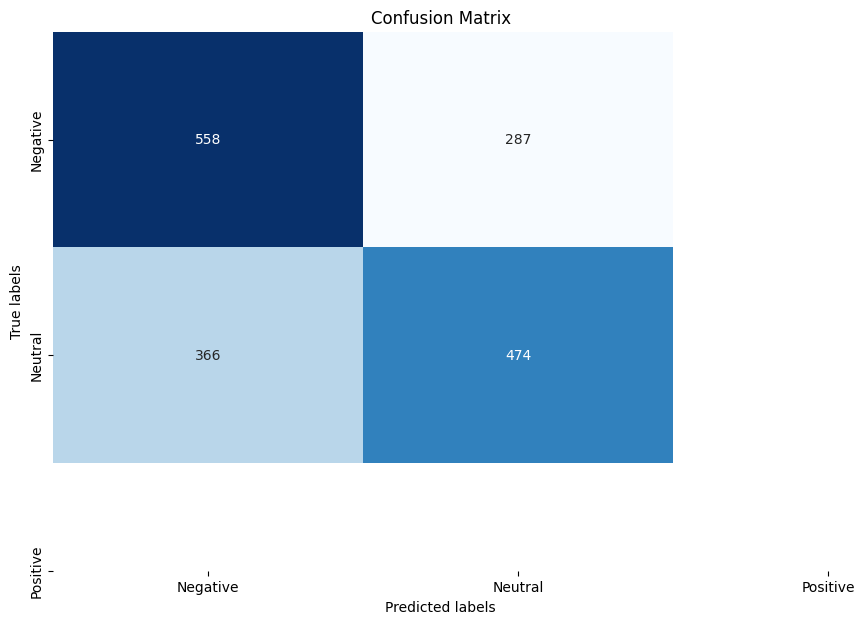

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have the class names stored in a list
class_names = ['Negative', 'Neutral', 'Positive']  # Modify as per your classes

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, class_names)